<a href="https://colab.research.google.com/github/BrMrtn/GoogleColab/blob/main/K%C3%A9pfeldolgoz%C3%A1s/ip_practice04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Processing Practice 4
1. Fourier Transform Basics
2. Filtering in Frequency Space
3. Character Recognition with FFT

----------------
## Preparations

downloading sample images

In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/messi5.jpg
!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/squirrel_cls.jpg

--2024-09-25 18:29:35--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/messi5.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72937 (71K) [image/jpeg]
Saving to: ‘messi5.jpg’

messi5.jpg          100%[===================>]  71.23K  --.-KB/s    in 0.007s  

2024-09-25 18:29:36 (9.52 MB/s) - ‘messi5.jpg’ saved [72937/72937]

--2024-09-25 18:29:36--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/squirrel_cls.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62311 (61K) [image/jpeg]
Sa

In [ ]:
import numpy as np
from numpy.fft import fft2, fftshift, ifftshift, ifft2
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt
import cv2

utility function(s)

In [ ]:
def imshow(I, title=None, axis=False):
  if len(I.shape) == 2:
    plt.imshow(I, cmap="gray")
  else:
    plt.imshow(I)

  if title is not None:
    plt.title(title)
  plt.axis(axis)

  plt.show()


def imshowpair(imgs, figsize=(12,6), titles=[None, None], axis=False):
  assert len(imgs) == 2, f"Imshowpair only accepts 2 length list or tuple of images but found length {len(imgs)}"
  plt.figure(figsize=figsize)

  plt.subplot(121)
  plt.imshow(imgs[0], cmap = 'gray')
  if titles[0] is not None:
    plt.title(titles[0])
  plt.axis(axis)

  plt.subplot(122)
  plt.imshow(imgs[1], cmap = 'gray')
  if titles[1] is not None:
    plt.title(titles[1])
  plt.axis(axis)

  plt.tight_layout()
  plt.show()

Choose an image!

In [ ]:
#sample_path = cbook.get_sample_data('grace_hopper.jpg').name
#sample_path = "squirrel_cls.jpg"
sample_path = "messi5.jpg"

-----------
## 1. Fourier Transform Basics

__1D Discrete Fourier Transform__

$F = \sum_{k=-\infty}^{\infty}f[x]e^{-j\vartheta k}$

__With Finite Number of Samples__

$F(u) = \sum_{x=0}^{N-1}f[k]e^{-j (2\pi/N)ux}$

__Extending to 2D__

$F(u, v) = \sum_{x=0}^{N-1}f[x, y]e^{-j (2\pi/N)ux}\sum_{y=0}^{N-1}f[x, y]e^{-j (2\pi/N)vy}$

------------------
## 2. Filtering in Frequency Space
Corresponding [OpenCV tutorial](https://docs.opencv.org/4.x/de/dbc/tutorial_py_fourier_transform.html)

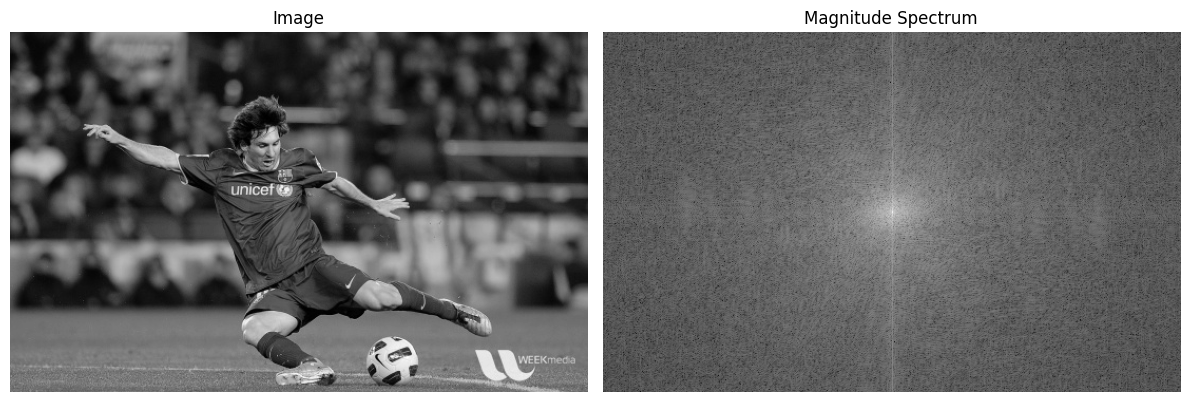

In [ ]:
img = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)
f = fft2(img)
f = fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(f))

imshowpair(imgs=[img, magnitude_spectrum],
           titles=["Image", "Magnitude Spectrum"])

### 2.1. Ideal Filters

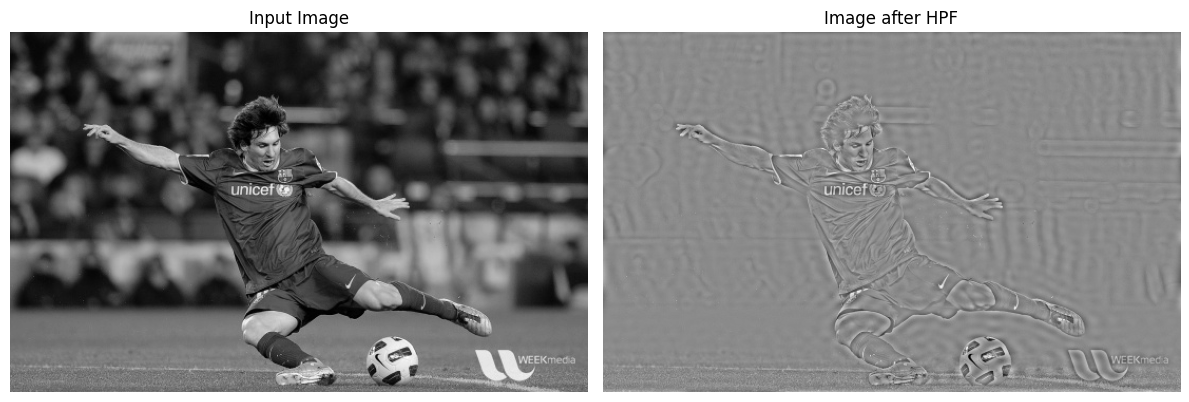

In [ ]:
H, W = img.shape
h, w = H//2, W//2

f_highpass = f.copy()
f_highpass[h-30:h+31, w-30:w+31] = 0
f_ishift = ifftshift(f_highpass)
img_ideal_highpass = ifft2(f_ishift)
img_ideal_highpass = np.real(img_ideal_highpass)

imshowpair(imgs=[img, img_ideal_highpass],
           titles=["Input Image", "Image after HPF"])

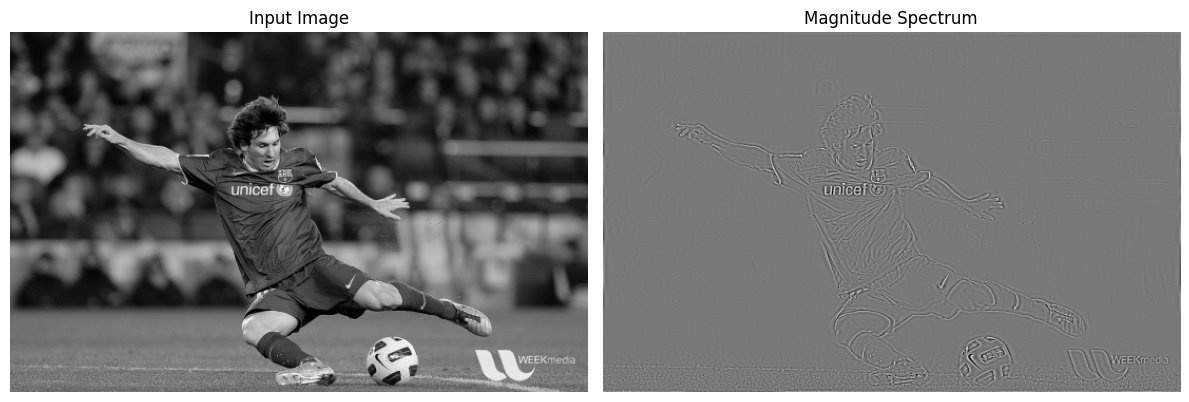

In [ ]:
mask = np.zeros((H, W),np.uint8)
mask[h-30:h+30, w-30:w+30] = 1

f_lowpass = f.copy()
fshift = f_lowpass*mask
f_ishift = ifftshift(fshift)
img_ideal_lowpass = ifft2(f_ishift)
img_ideal_lowpass = np.real(img_ideal_lowpass)

imshowpair(imgs=[img, img_ideal_lowpass],
           titles=["Input Image", "Magnitude Spectrum"])

### 2.2. Butterworth Filter

[[0.17 0.2  0.22 0.24 0.24 0.24 0.24 0.22 0.2  0.17]
 [0.2  0.23 0.27 0.3  0.32 0.32 0.3  0.27 0.23 0.2 ]
 [0.22 0.27 0.33 0.41 0.45 0.45 0.41 0.33 0.27 0.22]
 [0.24 0.3  0.41 0.58 0.71 0.71 0.58 0.41 0.3  0.24]
 [0.24 0.32 0.45 0.71 1.   1.   0.71 0.45 0.32 0.24]
 [0.24 0.32 0.45 0.71 1.   1.   0.71 0.45 0.32 0.24]
 [0.24 0.3  0.41 0.58 0.71 0.71 0.58 0.41 0.3  0.24]
 [0.22 0.27 0.33 0.41 0.45 0.45 0.41 0.33 0.27 0.22]
 [0.2  0.23 0.27 0.3  0.32 0.32 0.3  0.27 0.23 0.2 ]
 [0.17 0.2  0.22 0.24 0.24 0.24 0.24 0.22 0.2  0.17]]


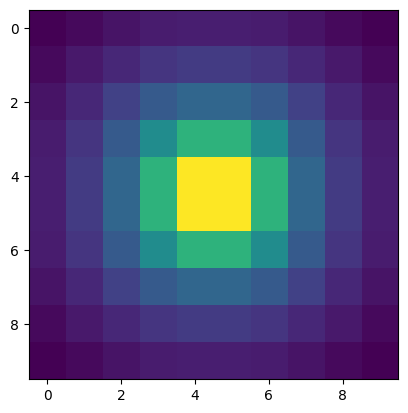

In [ ]:
def get_low_pass_filter(size, cutoff, order=1):
  assert type(size) == tuple, f"size must be tuple, got {type(size)} instead."
  assert len(size) == 2, f"Size must contain two elements, got {len(size)} instead."

  if size[0]%2 == 1:
    idxs0 = np.arange(size[0])-(size[0]//2)
    idxs0 = idxs0[:, None].repeat(size[1], axis=1)
  else:
    idxs0 = np.concatenate([np.arange(1-size[0]//2, 1),
                            np.arange(size[0]//2)])
    idxs0 = idxs0[:, None].repeat(size[1], axis=1)
  if size[1]%2 == 1:
    idxs1 = np.arange(size[1])-(size[1]//2)
    idxs1 = idxs1[None, :].repeat(size[0], axis=0)
  else:
    idxs1 = np.concatenate([np.arange((1-size[1]//2), 1),
                            np.arange(size[1]//2)])
    idxs1 = idxs1[None, :].repeat(size[0], axis=0)

  distances = np.sqrt(idxs0**2 + idxs1**2)

  filter = 1/np.sqrt(1 + (distances/cutoff)**(2*order))

  return filter


np.set_printoptions(precision=2)
filter = get_low_pass_filter((10, 10), 1, order=1)
print(filter)
plt.imshow(filter)
plt.show()

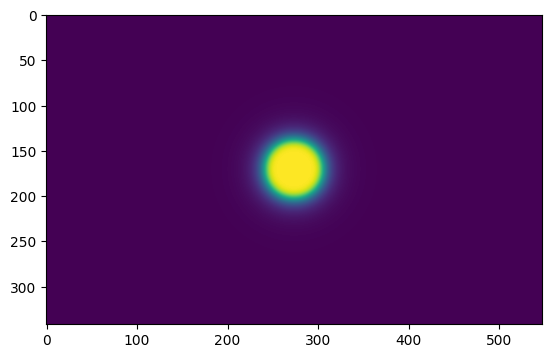

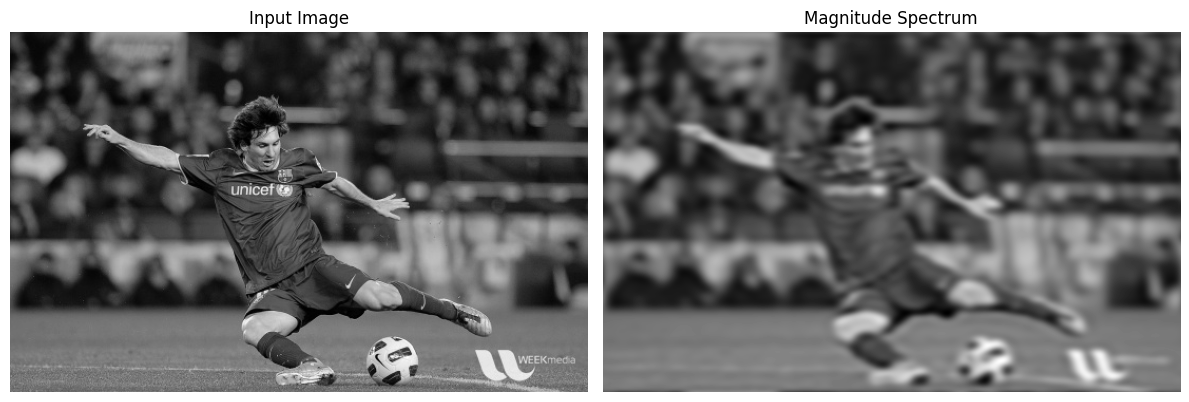

In [ ]:
filter = get_low_pass_filter(img.shape, cutoff=30, order=5)
plt.imshow(filter); plt.show()

f_lowpass = f.copy()
fshift = f_lowpass*filter
f_ishift = ifftshift(fshift)
img_butter_lowpass = ifft2(f_ishift)
img_butter_lowpass = np.real(img_butter_lowpass)

imshowpair(imgs=[img, img_butter_lowpass],
           titles=["Input Image", "Magnitude Spectrum"])

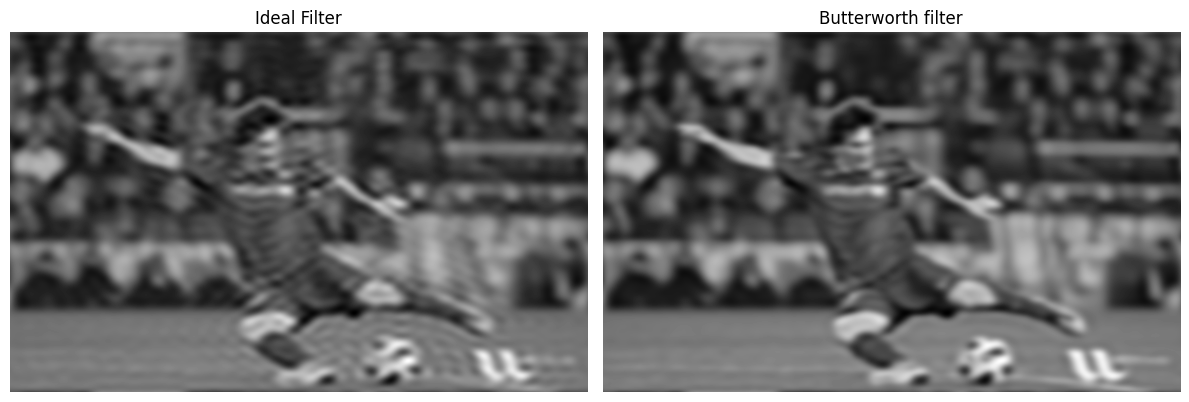

In [ ]:
imshowpair([img_ideal_lowpass, img_butter_lowpass],
           titles=["Ideal Filter", "Butterworth filter"])

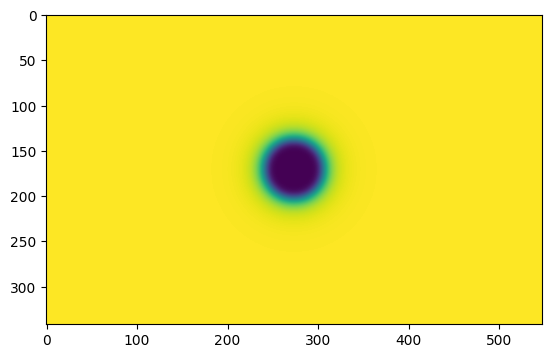

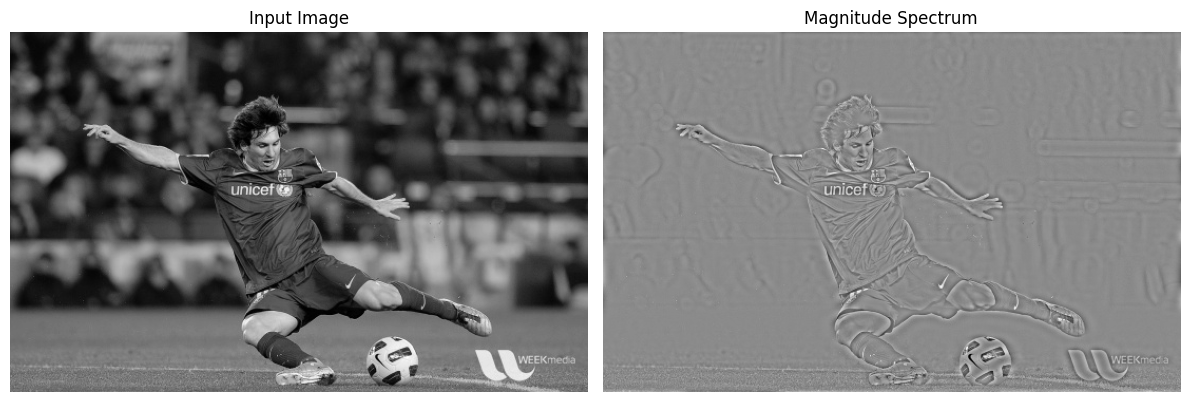

In [ ]:
filter = 1-get_low_pass_filter(img.shape, cutoff=30, order=5)
plt.imshow(filter); plt.show()

f_lowpass = f.copy()
fshift = f_lowpass*filter
f_ishift = ifftshift(fshift)
img_butter_highpass = ifft2(f_ishift)
img_butter_highpass = np.real(img_butter_highpass)

imshowpair(imgs=[img, img_butter_highpass],
           titles=["Input Image", "Magnitude Spectrum"])

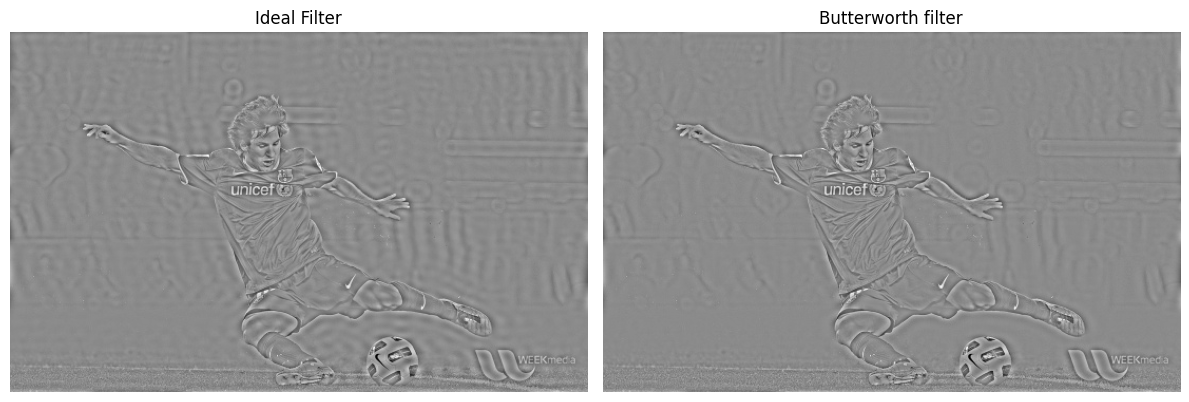

In [ ]:
imshowpair([img_ideal_highpass, img_butter_highpass],
           titles=["Ideal Filter", "Butterworth filter"])

----------------
## 3. Character Recognition with FFT

## 3.1. Preparations (supplementary code)

downloading sample document

In [ ]:
!wget https://deeplearning.iit.bme.hu/Public/ImProc/document_sample1.png

--2024-09-25 21:29:09--  https://deeplearning.iit.bme.hu/Public/ImProc/document_sample1.png
Resolving deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)... 152.66.243.112
Connecting to deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)|152.66.243.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 356651 (348K) [image/png]
Saving to: ‘document_sample1.png’

document_sample1.pn 100%[===================>] 348.29K  --.-KB/s    in 0.09s   

2024-09-25 21:29:10 (3.89 MB/s) - ‘document_sample1.png’ saved [356651/356651]



reading, separating character crop and line crop

In [ ]:
doc = cv2.imread("document_sample1.png", cv2.IMREAD_GRAYSCALE)

H, W = doc.shape

letters_crop = doc[1150:1350, 500:1750]
line_crop = doc[1500:1570, 540:2000]

separating characters

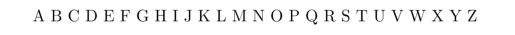

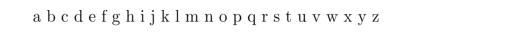

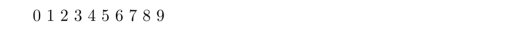

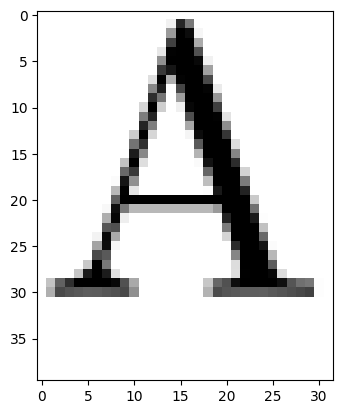

(40, 32)


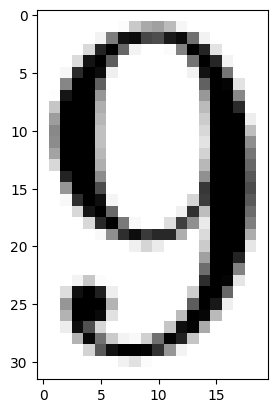

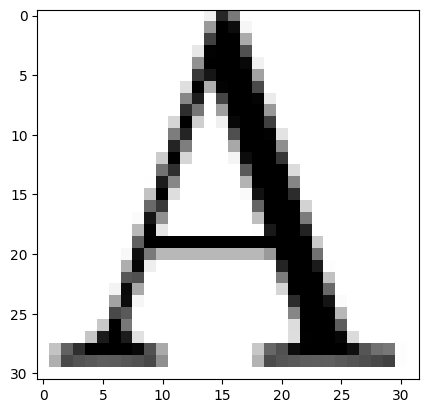

(31, 32)


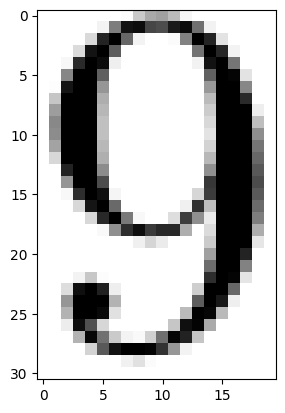

In [ ]:
charset = "A B C D E F G H I J K L M N O P Q R S T U V W X Y Z a b c d e f g h i j k l m n o p q r s t u v w x y z 0 1 2 3 4 5 6 7 8 9".split(" ")
letters = []

# Line separation
h, w = letters_crop.shape
line_starts = []
line_ends = []
sums = np.sum(letters_crop, axis=1)/255
start = False
for y in range(h):
    if start and (sums[y] == w):
      start = False
      line_ends.append(y+1)
    elif not start and (sums[y] < w):
      start = True
      line_starts.append(y-1)

assert len(line_starts) == len(line_ends), "Length of start and end indices are not matching!"

lines = [letters_crop[start:end] for start, end in zip(line_starts, line_ends)]
assert len(lines) == 3, "Could not separate all letter lines properly!"
imshow(lines[0])
print()
imshow(lines[1])
print()
imshow(lines[2])
print()

# Letter separation
for line in lines:
  h, w = line.shape
  sums = np.sum(line, axis=0)/255
  letter_start = 0
  started = False
  for x in range(w):
    if started and (sums[x] == h):
      started = False
      letters.append(line[:, letter_start-1:x+1])
    elif not started and (sums[x] < h):
      started = True
      letter_start = x

assert len(charset) == len(letters), "charset and letters array length mismatch!"
imshow(letters[0], axis=True)
print(letters[0].shape)
imshow(letters[-1], axis=True)


# Vertical crop
def vertical_crop(letter):
  h, w = letter.shape
  sums = np.sum(letter, axis=1)/255

  letter_start = 0
  letter_end = h
  started = False
  ended = False
  cropped_letter = None
  for y in range(h):
    if started and not ended and (sums[y] == w):
      ended = True
      letter_end = y+1
    elif ended and (sums[y] < w):
      ended = False
    elif not started and (sums[y] < w):
      started = True
      letter_start = y
    cropped_letter = letter[letter_start:letter_end, :]

  return cropped_letter

for i in range(len(letters)):
  letters[i] = vertical_crop(letters[i])

assert len(charset) == len(letters), "charset and letters array length mismatch!"
imshow(letters[0], axis=True)
print(letters[0].shape)
imshow(letters[-1], axis=True)

cropping line of text more precisely

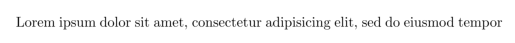

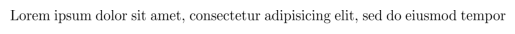

In [ ]:
imshow(line_crop)

h, w = line_crop.shape
v_sums = np.sum(line_crop, axis=0)/255
h_sums = np.sum(line_crop, axis=1)/255

found_top = False
found_bot = False
top, bot = 0, 0
i = 0
while (i < (h//2)) and not (found_top and found_bot):
  if not found_top and (h_sums[i]<w):
    found_top = True
    top = i
  if not found_bot and (h_sums[h-(i+1)]<w):
    found_bot = True
    bot = h-i
  i += 1

found_left = False
found_right = False
left, right = 0, 0
i = 0
while (i < (w//2)) and not (found_left and found_right):
  if not found_left and (v_sums[i]<h):
    found_left = True
    left = i
  if not found_right and (v_sums[w-(i+1)]<h):
    found_right = True
    right = w-i
  i += 1

line_crop2 = line_crop[top-1:bot+1, left-1:right+1]
imshow(line_crop2)

determining character edges

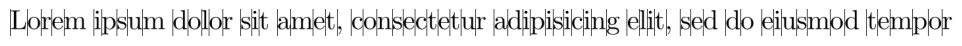

In [ ]:
h, w = line_crop2.shape
empty_columns = np.sum(line_crop2, axis=0)/255
empty_columns = (empty_columns == h)

char_starts = np.zeros_like(empty_columns)
char_starts[:-1] = (empty_columns[0:-1] == 1) & (empty_columns[1:] == 0)
char_ends = np.zeros_like(empty_columns)
char_ends[:-1] = (empty_columns[0:-1] == 0) & (empty_columns[1:] == 1)

line_crop3 = line_crop2.copy()
line_crop3[:, char_starts] = 0

plt.figure(figsize=(10, 6))
plt.imshow(line_crop3, cmap="gray")
plt.tight_layout()
plt.axis(False)
plt.show()

separating line characters

In [ ]:
separated_chars = []
char_started = False
start_index = 0
for i in range(len(empty_columns)):
  if char_started and char_ends[i]:
    char_started = False
    letter_crop = vertical_crop(line_crop2[:, start_index:i+2])
    h, w = letter_crop.shape
    if h > 10 and w > 10:
      separated_chars.append(letter_crop)
  if not char_started and char_starts[i]:
    char_started = True
    start_index = i

### 3.2. Transforming Character Set

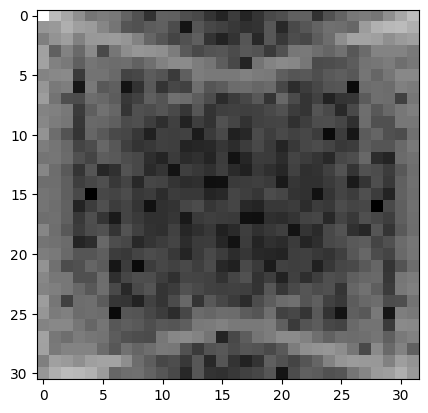

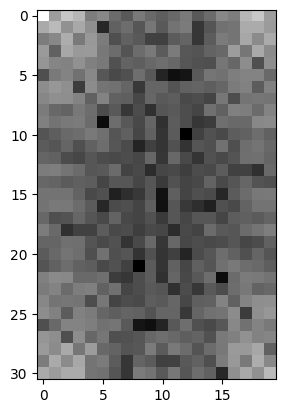

In [ ]:
letter_ffts = []
for letter in letters:
  f = fft2(letter)
  f = 20*np.log(np.abs(f))
  letter_ffts.append(f)

plt.imshow(letter_ffts[0], cmap="gray");plt.show()
plt.imshow(letter_ffts[-1], cmap="gray");plt.show()

## 3.3. Transforming Line Characters

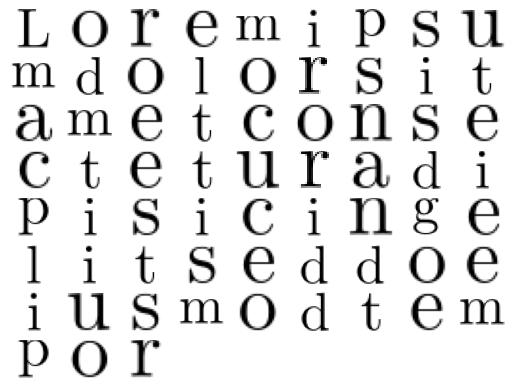

In [ ]:
import math
rows = math.ceil(len(separated_chars)/9)
for i in range(len(separated_chars)):
  plt.subplot(rows, 9, i+1)
  plt.imshow(separated_chars[i], cmap="gray")
  plt.axis(False)

plt.show()

In [ ]:
line_ffts = []
for separated_char in separated_chars:
  f = fft2(separated_char)
  f = 20*np.log(np.abs(f))
  line_ffts.append(f)

### 3.4. Searching for Closest FFT

In [ ]:
def centercrop(img, size):
  imh, imw = img.shape
  if imw == size[1]:
    start_x = 0
    end_x = imw
  else:
    start_x = (imw - size[1]) // 2
    end_x = start_x+size[1]
  if imh == size[0]:
    start_y = 0
    end_y = imh
  else:
    start_y = (imh - size[0]) // 2
    end_y = start_y+size[0]

  cropped = img.copy()[start_y:end_y, start_x:end_x]

  return cropped


detected_chars = []
for i in range(len(line_ffts)):
  best_match_index = 0
  lowest_error = 10000

  best_pair = None
  for j in range(len(letter_ffts)):
    line_char_fft = line_ffts[i].copy()
    H, W = line_char_fft.shape
    letter_fft = letter_ffts[j].copy()
    h, w = letter_fft.shape
    if abs(h-H)<5 and abs(w-W)<5:
      minh, minw = min(h, H), min(w, W)
      line_char_fft = line_char_fft[:minh, :minw]
      letter_fft = letter_fft[:minh, :minw]

      letter_error = np.sum(np.abs(letter_fft-line_char_fft))
      if letter_error < lowest_error:
        lowest_error = letter_error
        best_match_index = j
        best_pair = [letter_fft, line_char_fft]

  #print(lowest_error)
  #imshowpair(best_pair)
  detected_chars.append(charset[best_match_index])

reference_text = "Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor"
print(reference_text)
for i in range(len(reference_text)):
  if reference_text[i] == ',':
    detected_chars.insert(i, ',')
  if reference_text[i] == ' ':
    detected_chars.insert(i, ' ')
print(''.join(detected_chars))

Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor
Lcrem ipsum belcr sit amet, cousectetnr abipisicing elit, sed dc eiusmeb tempor
